In [1]:
# https://keras.io/examples/vision/mnist_convnet/
# https://www.kaggle.com/code/shivanisheth2911/lstm-keras-on-mnist

In [2]:
import keras
from keras import layers
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Dataset

In [3]:
input_shape = (28, 28, 1)
num_classes = 10

In [4]:
# Dataset Size
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Make Models

In [5]:
def make_cnn(input_shape, num_classes):
    model = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model

## Experiment

In [6]:
def fit_and_validate(model, model_name, epochs, x_train, y_train, x_test, y_test, df):
    batch_size = 128

    start_time = time.time()
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    time_to_train = time.time() - start_time

    score = model.evaluate(x_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])

    start_time = time.time()
    model.predict(x_test)
    time_to_predict = time.time() - start_time

    df.loc[len(df)] = [model_name, batch_size, epochs, len(x_train), time_to_train, 0, time_to_predict, score[1]]
    return df

In [7]:
# Action Space
all_epochs = [2]
all_models = {
    "CNN": make_cnn(input_shape, num_classes)
}
all_dataset_sizes = [i/100 for i in range(25, 105, 5)]

In [8]:
# Data Collection
df = pd.DataFrame(columns=['model', 'batch_size', 'epochs', 'dataset_size', 'time_to_train', 'time_to_retrain', 'time_to_predict', 'accuracy'])

In [9]:
for i in range(10):
    for epochs in all_epochs:
        for model in all_models:
            for dataset_size in all_dataset_sizes:
                print(f"{i}/10  {epochs}  {model}  {dataset_size}")
                size = int(len(x_train) * dataset_size)
    
                subset_x_train = x_train[:size]
                subset_y_train = y_train[:size]
                subset_x_test = x_test[:size]
                subset_y_test = y_test[:size]
                
                df = fit_and_validate(all_models[model], model, epochs, subset_x_train, subset_y_train, subset_x_test, subset_y_test, df)

0/10  2  CNN  0.25
Epoch 1/2
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5383 - loss: 1.4658 - val_accuracy: 0.9000 - val_loss: 0.3346
Epoch 2/2
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9175 - loss: 0.2651 - val_accuracy: 0.9493 - val_loss: 0.1744
Test loss: 0.13643117249011993
Test accuracy: 0.9627000093460083
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  
0/10  2  CNN  0.3
Epoch 1/2
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9449 - loss: 0.1793 - val_accuracy: 0.9656 - val_loss: 0.1105
Epoch 2/2
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9602 - loss: 0.1366 - val_accuracy: 0.9722 - val_loss: 0.0993
Test loss: 0.08192842453718185
Test accuracy: 0.9757999777793884
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 
0/10  2  CNN  0.35
Epoch 1/2
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9666 - loss: 0.1098 - val_accuracy: 0.9762 - val_loss: 0.0872
Epoch 2/2
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9693 - loss: 0.0964 - v

In [10]:
df

,model,batch_size,epochs,dataset_size,time_to_train,time_to_retrain,time_to_predict,accuracy
0,CNN,128,2,15000,3.796407,0,0.729447,0.9627
1,CNN,128,2,18000,3.878758,0,0.715003,0.9758
2,CNN,128,2,21000,4.358089,0,0.642641,0.9807
3,CNN,128,2,24000,4.881499,0,0.696114,0.9842
4,CNN,128,2,27000,5.609825,0,0.674142,0.9852
...,...,...,...,...,...,...,...,...
155,CNN,128,2,48000,12.141910,0,0.774163,0.9932
156,CNN,128,2,51000,12.856030,0,1.003472,0.9934
157,CNN,128,2,54000,12.934505,0,0.893753,0.9932
158,CNN,128,2,57000,13.981384,0,0.782208,0.9932


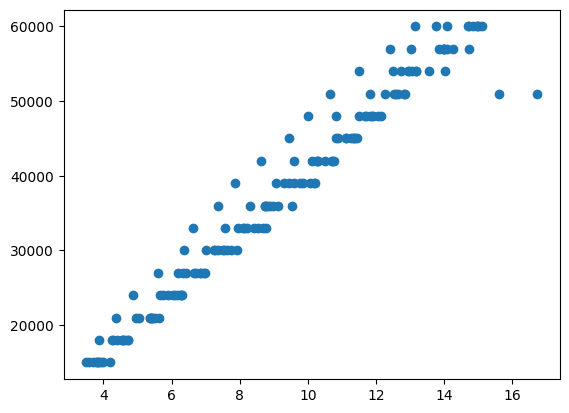

In [11]:
plt.scatter(df.time_to_train, df.dataset_size)

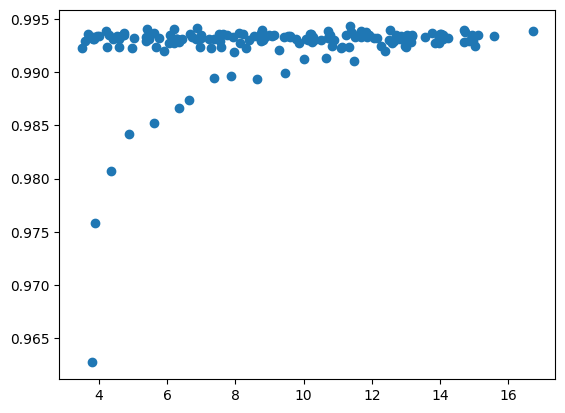

In [12]:
plt.scatter(df.time_to_train, df.accuracy)